Data Head:
   id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  
Column Names:
Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype

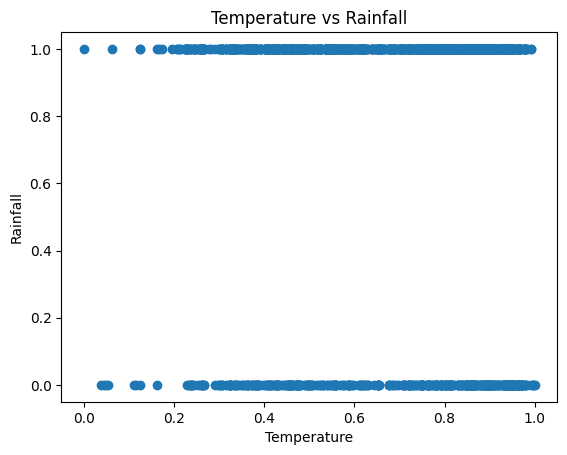

Mean Absolute Error: 0.23657117356621227
Mean Squared Error: 0.11749918913122162
R-squared: 0.40619281790021133
Predicted Rainfall: 0.939979050779373


c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle

# 1. Load and Inspect the Data
# Load the dataset
data = pd.read_csv('dataset/train.csv')

# Display the first few rows of the data
print("Data Head:")
print(data.head())

# Display the column names
print("Column Names:")
print(data.columns)

# 2. Data Preprocessing
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

# Normalize the data
scaler = MinMaxScaler()
data[['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']] = scaler.fit_transform(
    data[['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
)

# Save preprocessed data
data.to_csv('dataset/preprocessed_training.csv', index=False)

# Display the first few rows of the preprocessed data
print("Preprocessed Data Head:")
print(data.head())

# 3. Exploratory Data Analysis (EDA)
# Plotting temperature vs rainfall
plt.scatter(data['temparature'], data['rainfall'])
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.title('Temperature vs Rainfall')
plt.show()

# 4. Model Selection and Training
# Define features and target variable
X = data[['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']]
y = data['rainfall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# 5. Model Evaluation
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# 6. Model Deployment
# Save the model to a file
with open('rainfall_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from the file
with open('rainfall_prediction_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use the loaded model to make predictions
future_data = pd.DataFrame([[1017.4, 21.2, 20.6, 19.9, 19.4, 87.0, 88.0, 1.1, 60.0, 17.2]], 
                           columns=['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed'])
future_data_normalized = scaler.transform(future_data)  # Normalize input data
future_prediction = loaded_model.predict(future_data_normalized)
print(f'Predicted Rainfall: {future_prediction[0]}')